# Basics of Plotting in Python

In [1]:
#Import pandas and matplotlib
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Magic command to allow plots in Jupyter
%matplotlib inline

## Load the data as a dataframe

In [3]:
#Read the data into a data frame
df = pd.read_csv('../data/State_Data_Formatted_All.csv')
df.dtypes

State              object
Source             object
Type               object
Category           object
Withdrawal_MGD    float64
Population          int64
dtype: object

## Explore the data

* View the top few rows with `head()`. Alternatively, try `sample(5)` to view a random sample or `tail()` to view the last lines of data. 

In [4]:
#View the first 5 rows
df.head()

,State,Source,Type,Category,Withdrawal_MGD,Population
0,Alabama,Surface,Fresh,Total,9470.0,4780000
1,Alaska,Surface,Fresh,Total,391.0,710000
2,Arizona,Surface,Fresh,Total,3540.0,6390000
3,Arkansas,Surface,Fresh,Total,3540.0,2920000
4,California,Surface,Fresh,Total,18800.0,37300000


*It's important here to examine your data to see what values are categorical and which are continuous. Think about the various ways we can filter, group, and aggregate the data to provide meaningful summaries.*

* Extract a list of unique values for a given column with `unique()`

In [5]:
#List unique values in the Category field
df['Type'].unique()

array(['Fresh', 'Saline'], dtype=object)

* Use the `value_counts()` to tabulate the number of records within each unique value

In [6]:
#Count the number of records in each category with the value_counts() function
df['Category'].value_counts()

Total             424
Aquaculture       318
Public Supply     212
Irrigation        212
Livestock         212
Thermoelectric    212
Industrial        212
Self Supplied     212
Mining            212
Name: Category, dtype: int64

* Not very interesting as the data is regulalry sampled, but what if we filter the data to records with a Withdrawal above zero?

In [7]:
dfNonZero = df.query('Withdrawal_MGD > 0')
dfNonZero['Category'].value_counts()

Total             298
Aquaculture       154
Thermoelectric    124
Mining            122
Public Supply     104
Irrigation        104
Livestock          98
Self Supplied      61
Industrial         57
Name: Category, dtype: int64

* Tables are one thing, but plots can communicate more effectively. We can plot the data in the above table simply by adding `.plot()` at the end of the statement.

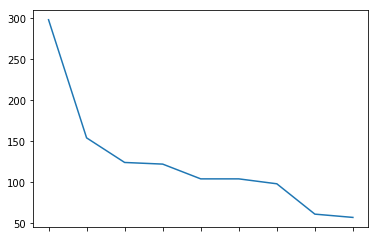

In [8]:
dfNonZero['Category'].value_counts().plot()

## Plotting!

#### Plot types
Ok, that first plot was somewhat easy, but not very pretty or all that informative. So let's now explore plotting! Let's dig deeper into how to modify the **kind** of plot (bar, pie, box, etc.) and how to tweak the **aesthetics** of the plot (color, title, labels, etc.).

* As seen above, the default plot type is line plot. We can change from the default using the `kind` parameter. First, we'll show that indeed the `line` is the default. (Also note that adding a `;` at the end of the statement suppresses the `<matplotlib.axes...` message. 

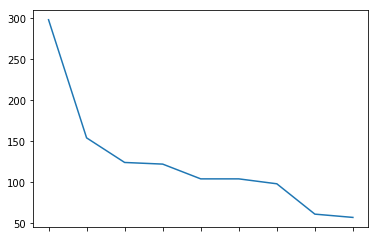

In [9]:
#Plot the number of records in each category; default is line
dfNonZero['Category'].value_counts().plot(kind='line');

* Change the `kind` of plot to `bar` to change it to a **bar** plot

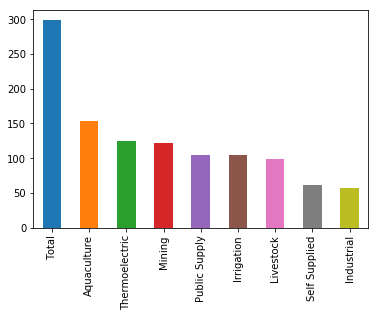

In [10]:
dfNonZero['Category'].value_counts().plot(kind='bar');

* Try other types: `barh`, `pie`, `box`

**NOTE** That different plots have specific uses:
 * <u>Line plots</u> are good for tracking change over time; the x-axis is continuous. 
 * <u>Bar and horizontal bar plots</u> can also track change over time, but here the x-axis (or y, if horizontal) is discrete, not continuous, so the time would be in blocks. These plots are also good for comparing values associated with various groups. 
 * <u>Pie charts</u> do not show change (no x-axis!) but are good at showing parts of a whole. 
 
There are many other types of plots and charts, of course, and each has a best case scenario. Check the literature for a more in-depth discussion on this. For example: see Stephanie Evergreen's [Chart Chooser utilities](http://stephanieevergreen.com/tag/chart-chooser/) for some ideas.


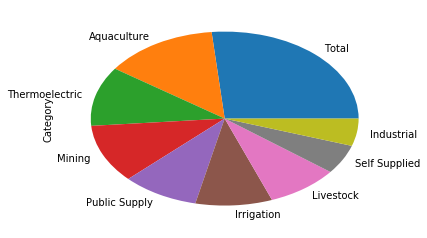

In [11]:
dfNonZero['Category'].value_counts().plot(kind='pie');

#### Color
* Change the color of the bars in the horizontal bar plot with the `color` option. You can use any named color shown here: https://matplotlib.org/examples/color/named_colors.html, or you can specify a color by it's hexcode (see https://htmlcolorcodes.com/) preceded by a `#`, e.g. `#ff5733`. Try changing the color below to `maroon`.

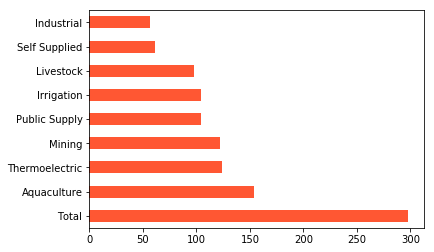

In [12]:
dfNonZero['Category'].value_counts().plot(kind='barh',color='#ff5733');

#### Size
* Change the size of the plot with `figsize=()`. Supply a tuple of widght and height to change the size of your plot. Values are somewhat arbitrary, so play around. (Also note that I've changed the format of the command, putting parameters on separate lines to make it more readable...) 

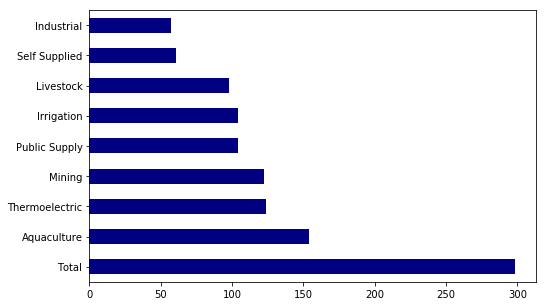

In [13]:
dfNonZero['Category'].value_counts().plot(kind='barh',
                                          color='navy',
                                          figsize=(8,5));

#### Colormaps

* *Colormaps* apply a suite of colors to values in a plot. Below is an example of applying a colormap to our pie chart. 

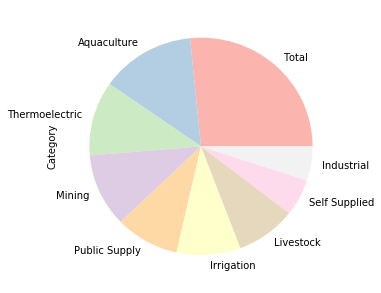

In [14]:
dfNonZero['Category'].value_counts().plot(kind='pie',
                                          colormap ='Pastel1',
                                          figsize=(5,5));

There are 3 classes of colormap, each with its own use:
 * **Sequential** colormaps have a change of lightness over one color. They used for continuous, ordered values.
 * **Diverging** colormaps are used when the information being plotted deviates around a middle value. Here there are often two different colors being used.
 * **Qualitative** colormaps are for unordered, categorical data.
 
See this link for a nice discussion:
https://matplotlib.org/users/colormaps.html

Matplotlib can do a *lot* more that what we've done here. However, it does get confusing, and you can see some examples in past notebooks. 

## More complex plots with Seaborn
Seaborn works in conjunction with matplotlib and was created to make matplotlib easier.  Seaborn, as with Matplotlib, has methods for bar plots, histograms and pie charts. Let's take a look at an example of one of the methods, countplot. 

In [15]:
#Importing seaborn
import seaborn as sns

#### Countplots in Seaborn
Countplot has very similar parameters to Matplotlib. The **data** parameter for countplot is where you provide the DataFrame or the source for the data. The **hue** is for the categorical variables. (Recall that a categorical variable is one that can only take a fixed number of values...) 

Lets creat a countplot first to show to show the count of records by `Type` (Fresh vs Saline) and then by both `Type` and `Source` (Surface vs Ground). 

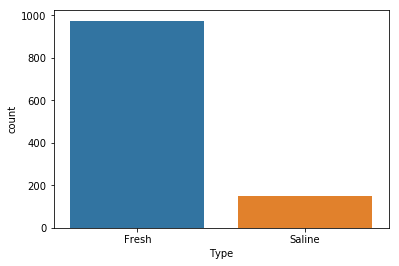

In [16]:
#Show the count of values, grouped by Type
sns.countplot(data=dfNonZero,x="Type");

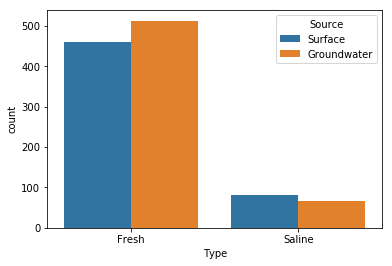

In [17]:
#Show the count of values, grouped by Type AND Source
sns.countplot(data=dfNonZero,x="Type",hue='Source');

## Challenge!
 * Plot the number of records 

In [45]:
df.columns

Index(['State', 'Source', 'Type', 'Category', 'Withdrawal_MGD', 'Population'], dtype='object')

In [46]:
#Filter out records listing Totals, so we can look at raw values
df2 = df.query('Category != "Total" and Withdrawal_MGD > 500')

In [48]:
#Group by state
g = df2.groupby(['State','Category']).size().unstack("Category",fill_value=0)

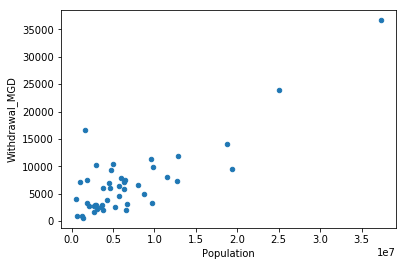

In [71]:
g = df2.groupby('State')
g = g.agg({"Withdrawal_MGD":'sum',"Population":'first'})
g.plot(kind='scatter',x='Population',y='Withdrawal_MGD')

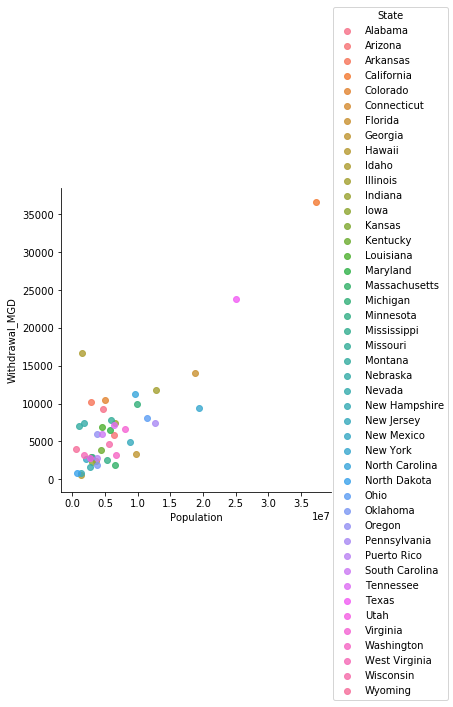

In [77]:
sns.lmplot(x='Population',
           y='Withdrawal_MGD',
           data=g.reset_index(),
           fit_reg=False,
           hue='State');

## Mapping with folium
The folium package is actually an interface for "Leaflet" a JavaScript API that allows us to plot markers on a map. In the exercise below, we'll first extract a set of NWIS sample points for a given state and then map the locations of these on a folium map.

In [ ]:
#Generate a list of all sites in NC using the NWIS API 
# see https://waterservices.usgs.gov/rest/DV-Service.html
url = 'http://waterservices.usgs.gov/nwis/site'
params = {'stateCd':'NC',        #NC Sites Only
          'siteStatus':'all', #Get all *active* sites
          'siteType':'ST',       #Stream sites only
          'parameterCd':'00060', #DISCHARGE(cfs)
          'seriesCatalogOutput':'TRUE',
          'format':'rdb'         #RDB (csv)
         }

#Send the requests and translate the response
response_raw = requests.get(url,params)

#Decode to remove any odd characters (accents, etc.)
response_clean = response_raw.content.decode('utf-8')

In [15]:
import urllib
baseURL = 'https://waterdata.usgs.gov/nwis/inventory?'
params = ({'state_cd':'nc',
           'group_key':'NONE',
           'format':'sitefile_output',
           'sitefile_output_format':'rdb',
           'column_name':'dec_lat_va',
           'column_name':'dec_long_va',
           'column_name':'drain_area_va',
           'list_of_search_criteria':'state_cd'})
theURL = baseURL + urllib.parse.urlencode(params)
#df = pd.read_csv()
theURL

'https://waterdata.usgs.gov/nwis/inventory?state_cd=nc&group_key=NONE&format=sitefile_output&sitefile_output_format=rdb&column_name=drain_area_va&list_of_search_criteria=state_cd'

'<!DOCTYPE html>\n\n<head>\n<title>USGS User Input Message</title>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<!-- <meta http-equiv="X-UA-Compatible" content="IE=edge"> -->\n<!--[if IE]><meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\'><![endif]-->\n<meta name="viewport" content="width=device-width,initial-scale=1"/>\n<meta http-equiv="P3P" content=\'policyref="https://waterdata.usgs.gov/w3c/p3p.xml"\'>\n<link rel="P3Pv1" href="https://waterdata.usgs.gov/w3c/p3p.xml" type="text/xml" />\n<link rel="alternate" type="application/rss+xml" title="USGS Water Data for the Nation and USGS Water Services News" href="https://help.waterdata.usgs.gov/news/RSS/" />\n<link rel="stylesheet" type="text/css" href="/nwisweb/stylesheets/USGS_common.css" />\n<link rel="stylesheet" type="text/css" href="/nwisweb/stylesheets/USGS_custom.css" />\n<!--<link rel="stylesheet" type="text/css" href="/nwisweb/stylesheets/nwisweb.css" />-->\n\n<!-- JF - media queries - responsive d

In [ ]:
https://waterdata.usgs.gov/nwis/inventory?
    state_cd=nc
    &group_key=NONE
    &format=sitefile_output
    &sitefile_output_format=rdb
    &column_name=site_no
    &column_name=station_nm
    &column_name=site_tp_cd
    &column_name=dec_lat_va
    &column_name=dec_long_va
    &list_of_search_criteria=state_cd